### Importing the libraries

In [1]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\astth\appdata\roaming\python\python37\site-packages (0.8.1)Note: you may need to restart the kernel to use updated packages.



In [2]:
# Importing the libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,roc_curve,recall_score,precision_score,fbeta_score,accuracy_score,auc,precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
import matplotlib.colors as mcolors

### Importing the Datasets

In [3]:
# Import the dataset and the training, test set 
data = pd.read_csv('diabetic_data.csv')
train = pd.read_csv('diabetic_data_train.csv',index_col = 0)
test = pd.read_csv('diabetic_data_test.csv', index_col = 0)
ID_mapping = pd.read_csv('IDs_mapping.csv')

### Exploratory Data Analysis

In [4]:
# Getting the information about the training set
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76324 entries, 93634 to 26387
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              76324 non-null  int64 
 1   patient_nbr               76324 non-null  int64 
 2   race                      76324 non-null  object
 3   gender                    76324 non-null  object
 4   age                       76324 non-null  object
 5   weight                    76324 non-null  object
 6   admission_type_id         76324 non-null  int64 
 7   discharge_disposition_id  76324 non-null  int64 
 8   admission_source_id       76324 non-null  int64 
 9   time_in_hospital          76324 non-null  int64 
 10  payer_code                76324 non-null  object
 11  medical_specialty         76324 non-null  object
 12  num_lab_procedures        76324 non-null  int64 
 13  num_procedures            76324 non-null  int64 
 14  num_medications   

In [5]:
# Checking the columns of the training set.
train.columns.values

array(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype=object)

In [6]:
# Checking the first five records of the training set.
train.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
93634,338369606,159605546,AfricanAmerican,Male,[70-80),?,1,23,7,3,...,No,No,No,No,No,No,No,No,No,NO
27698,90739116,83232054,Caucasian,Female,[70-80),[75-100),3,1,1,1,...,No,No,No,No,No,No,No,No,No,NO
17488,64286964,95117913,Caucasian,Male,[60-70),?,3,1,1,4,...,No,No,No,No,No,No,No,Ch,Yes,>30
96510,376610012,136697972,AfricanAmerican,Male,[40-50),?,3,1,1,2,...,No,No,No,No,No,No,No,No,No,NO
35774,110557278,2851308,Caucasian,Male,[80-90),?,1,1,6,1,...,No,No,No,No,No,No,No,No,No,NO


In [7]:
# Summary statistics of the data
train.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,7.632400e+04,7.632400e+04,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000
mean,1.657131e+08,5.440963e+07,2.020059,3.720992,5.751703,4.400084,43.136445,1.335163,16.025942,0.375046,0.200985,0.639432,7.423602
std,1.027571e+08,3.872523e+07,1.441786,5.289243,4.050886,2.985689,19.673383,1.701378,8.119375,1.291108,0.936242,1.273049,1.938609
min,1.252200e+04,7.290000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.548698e+07,2.341891e+07,1.000000,1.000000,1.000000,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.526763e+08,4.559911e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.307394e+08,8.761871e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


From the summary statistics, it does not seem that there are any unusual jumps in the numeric columns of the dataset.

In [8]:
# Computing the distribution of the classes.
counts = train['readmitted'].value_counts().to_frame().reset_index().rename(columns={'index':'readmitted','readmitted':'counts'})
counts

,readmitted,counts
0,NO,41148
1,>30,26658
2,<30,8518


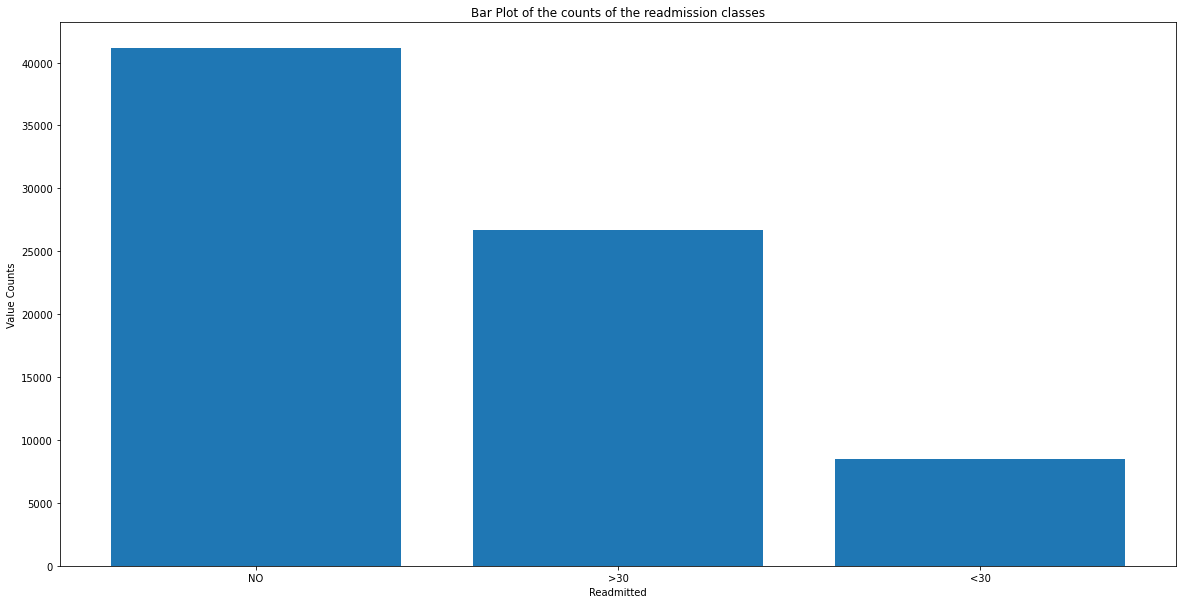

In [9]:
# Creating a bar plot indicating the class distribution.
plt.figure(figsize=(20,10))
plt.bar(x='readmitted',height='counts',data=counts)
plt.xlabel('Readmitted')
plt.ylabel('Value Counts')
plt.title('Bar Plot of the counts of the readmission classes')
plt.show()

From the above bar plot, it is quite evident that the number of patients that required readmission within 30 days is far less than the number of patients that required readmission after 30 days and the number of patients that did not require readmission. Hence, this is a **class imbalance dataset**.

### Data Preprocessing

**Step 1: Target Variable Encoding<br><br>**
First of all, I will encode the target variable. We are interested in the early readmission of patients. So, I will encode the <30 class as 1 and other classes(NO,>30) as 0

**Step 2: Dropping Unwanted Columns<br><br>**
I will drop the below columns:<br><br>
(i) **encounter_id** - unique identifier of the encounter. This is just an ID and has nothing to do with the classification and will cause issues in distance computation if considered. <br>
(ii) **patient_nbr** - unique identifier of the encounter. This is just an ID and has nothing to do with the classification and will cause issues in distance computation if considered. <br>
(iii) **Weight** - 97% values in this column are null and hence we can simply drop this column. 
Reference: https://downloads.hindawi.com/journals/bmri/2014/781670.pdf

**Step 3: Handling Null values**

Reference: https://downloads.hindawi.com/journals/bmri/2014/781670.pdf <br>
From the above article, the below columns contain null values and it is specified as '?'<br>
(i)  **Race**<br>
(ii) **Weight**: We have already dropped this column<br>
(iii) **Payer code**<br>
(iv) **Medical specialty**<br>
(v) **Diagnosis 3**<br>

All of the above columns have nominal(categorical) values. So we can replace the null values with the mode (most frequently occuring value) of that particular column. If the mode is the null value itself, then we will consider the next frequently occuring column.

**Exception:** For the **Medical specialty** column, there are a huge number of null values and it seems that they are legitimate and there is an unknown medical procedure which is performed. Hence, we will create a new category called 'Unknown' and replace the **null values with 'Unknown'** 

**Important Note**: For the test set also, we need to consider the summary statistics of the training set as the test set should ideally be processed one row at a time in the real world and hence we **should not** be using the mode of columns in the test set while preprocessing it and instead we will use the mode of the the same column from the training set.

In [10]:
# Mode of the race column in the training set
print(f"Number of null values in Race column = {sum(train['race']=='?')}")
print(f"Mode of Race column is {train['race'].mode()[0]}")

Number of null values in Race column = 1708
Mode of Race column is Caucasian


In [11]:
# Mode of payer code column in the training set
print(f"Number of null values in Payer Code column = {sum(train['payer_code']=='?')}")
print(f"Mode of Payer Code column is {train['payer_code'].value_counts().index[1]}")

Number of null values in Payer Code column = 30048
Mode of Payer Code column is MC


In [12]:
# Mode of diagnosis 3 column in the training set
print(f"Number of null values in Diagnosis 3 column = {sum(train['diag_3']=='?')}")
print(f"Mode of Diagnosis 3 column is {train['diag_3'].mode()[0]}")

Number of null values in Diagnosis 3 column = 1081
Mode of Diagnosis 3 column is 250


**Step 4: Encoding of the Categorical columns**

In [13]:
# Getting all the categorical columns from the training set.
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
# Removing the weight column as we will be dropping it
categorical_columns.remove('weight')
# Removing the readmitted column as it will not be a part of the feature space
categorical_columns.remove('readmitted')
categorical_columns

['race',
 'gender',
 'age',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

**Step 4(i): Other Encoding of columns** 

I will be performing OneHotEncoding of all columns except four because:<br><br>
(i) In the 'glimepiride-pioglitazone' column, there is just one value 'No' in the training set and it won't make sense to OneHotEncode it as the resulting atrribute won't be binary at all(all values will be 1).<br><br>
(ii) In the columns 'diag_1','diag_2','diag_3', there are a huge number of categorical values. So, OneHotEncoding them will increase the feature space tremendously and the model can suffer from the curse of dimensionality.<br><br>
For these, we can use LabelEncoder instead.

In [14]:
# Only one value 'No' for glimepiride-pioglitazone column
np.unique(train['glimepiride-pioglitazone'])

array(['No'], dtype=object)

In [15]:
# Large number of unique values for diag_1 column
np.unique(train['diag_1'])

array(['10', '11', '110', '112', '114', '115', '117', '131', '133', '135',
       '136', '141', '142', '143', '146', '147', '148', '149', '150',
       '151', '152', '153', '154', '155', '156', '157', '158', '161',
       '162', '163', '164', '170', '171', '172', '173', '174', '175',
       '179', '180', '182', '183', '184', '185', '187', '188', '189',
       '191', '192', '193', '194', '195', '196', '197', '198', '199',
       '200', '201', '202', '203', '204', '205', '207', '208', '210',
       '211', '212', '214', '215', '216', '218', '219', '220', '223',
       '225', '226', '227', '228', '23', '230', '233', '235', '236',
       '237', '238', '239', '240', '241', '242', '244', '245', '246',
       '250', '250.01', '250.02', '250.03', '250.1', '250.11', '250.12',
       '250.13', '250.2', '250.21', '250.22', '250.23', '250.3', '250.31',
       '250.32', '250.33', '250.4', '250.41', '250.42', '250.43', '250.5',
       '250.52', '250.53', '250.6', '250.7', '250.8', '250.81', '250.82',

In [16]:
# Large number of unique values for diag_2 column
np.unique(train['diag_2'])

array(['11', '110', '111', '112', '114', '117', '130', '131', '135',
       '136', '137', '138', '140', '141', '145', '150', '151', '152',
       '153', '154', '155', '156', '157', '162', '163', '164', '171',
       '172', '173', '174', '179', '180', '183', '185', '188', '189',
       '191', '192', '193', '195', '196', '197', '198', '199', '200',
       '201', '202', '203', '204', '205', '208', '211', '214', '215',
       '217', '218', '220', '225', '226', '227', '232', '233', '235',
       '238', '239', '240', '241', '242', '244', '245', '246', '250',
       '250.01', '250.02', '250.03', '250.1', '250.11', '250.12',
       '250.13', '250.2', '250.21', '250.22', '250.23', '250.3', '250.31',
       '250.32', '250.33', '250.4', '250.41', '250.42', '250.43', '250.5',
       '250.51', '250.52', '250.53', '250.6', '250.7', '250.8', '250.81',
       '250.82', '250.83', '250.9', '250.91', '250.92', '250.93', '251',
       '252', '253', '255', '256', '258', '259', '260', '261', '262',
       '

In [17]:
# Large number of unique values for diag_3 column
np.unique(train['diag_3'])

array(['11', '110', '111', '112', '115', '117', '122', '123', '131',
       '132', '135', '136', '138', '139', '14', '141', '146', '148',
       '150', '151', '152', '153', '154', '155', '156', '157', '158',
       '161', '162', '163', '164', '17', '170', '172', '173', '174',
       '179', '180', '182', '183', '185', '186', '188', '189', '191',
       '192', '193', '196', '197', '198', '199', '200', '201', '202',
       '203', '204', '205', '208', '211', '214', '215', '216', '218',
       '220', '223', '225', '226', '227', '228', '230', '233', '235',
       '236', '238', '239', '240', '241', '242', '243', '244', '245',
       '246', '250', '250.01', '250.02', '250.03', '250.1', '250.11',
       '250.12', '250.13', '250.2', '250.21', '250.22', '250.23', '250.3',
       '250.31', '250.4', '250.41', '250.42', '250.43', '250.5', '250.51',
       '250.52', '250.53', '250.6', '250.7', '250.8', '250.81', '250.82',
       '250.83', '250.9', '250.91', '250.92', '250.93', '251', '252',
       '2

In [18]:
# Getting the four columns
other_encoded_columns = ['diag_1','diag_2','diag_3','glimepiride-pioglitazone']
other_encoded_columns

['diag_1', 'diag_2', 'diag_3', 'glimepiride-pioglitazone']

**Step 4(ii): One Hot Encoding of columns** 

One Hot Encode all other columns apart from the four mentioned in Step 4(i)

In [19]:
# All columns except the above four can be one hot encoded. So, getting a list of it.
one_hot_encoded_columns = list(set(categorical_columns)-set(other_encoded_columns))
one_hot_encoded_columns

['A1Cresult',
 'race',
 'gender',
 'chlorpropamide',
 'change',
 'miglitol',
 'glimepiride',
 'pioglitazone',
 'max_glu_serum',
 'examide',
 'diabetesMed',
 'glipizide',
 'rosiglitazone',
 'tolbutamide',
 'nateglinide',
 'glipizide-metformin',
 'citoglipton',
 'glyburide',
 'tolazamide',
 'glyburide-metformin',
 'medical_specialty',
 'age',
 'metformin',
 'acarbose',
 'insulin',
 'repaglinide',
 'payer_code',
 'troglitazone',
 'acetohexamide',
 'metformin-rosiglitazone',
 'metformin-pioglitazone']

In [20]:
def preprocess_data(df):
        # Step 1: Target Variable Encoding
        df['readmitted'] = df['readmitted'].map({'NO':0,'>30':0,'<30':1})
        
        # Step 2: Dropping Unwanted Columns
        df.drop('encounter_id',inplace=True,axis=1)  
        df.drop('patient_nbr',inplace=True,axis=1)
        df.drop('weight',inplace=True,axis=1)
        
        
        # Step 3: Handling Null Values
        df['race']=df['race'].replace('?','Caucasian')
        df['payer_code']=df['payer_code'].replace('?','MC')
        df['medical_specialty']=df['medical_specialty'].replace('?','Unknown')
        df['diag_3']=df['diag_3'].replace('?','250')
        
        # Step 4 (i): Label Encoding for categorical columns 'diag_1','diag_2','diag_3','glimepiride-pioglitazone'
        for column in other_encoded_columns:
            le = LabelEncoder()
            df[column]=le.fit_transform(df[column])
        
        # Step 4 (ii): One Hot Encoding of categorical variables except 'diag_1','diag_2','diag_3','glimepiride-pioglitazone'
        encoded_columns = pd.get_dummies(df[one_hot_encoded_columns])
        df = pd.concat([df,encoded_columns],axis=1)
        df.drop(one_hot_encoded_columns,inplace=True,axis=1)
        
        return df

**Possible Improvements in the Final Workflow**<br><br>
In the rough implementation, I have processed the entire training and test sets through one function. However, in the real world, the test set is processed row by row. I will try to split the preprocess function where the training set is processed all at once and test set is processed one row at a time. Also, if the test set is processed row by row, encoding will be a challenge and hence I will try to replace label and one-hot encoder with my own custom encoder. 

In [21]:
# Preprocessing the train and test set
train = preprocess_data(train) 
test = preprocess_data(test)

In [22]:
# Getting the number of columns in the train and test set
print(f'Number of columns in train set = {len(train.columns.values)}')
print(f'Number of columns in test set = {len(test.columns.values)}')

Number of columns in train set = 205
Number of columns in test set = 182


There are some one hot encoded columns in the train set which are missing in the test set (**This means that some values were encountered only in the training set and not in the test set**). We need the number of columns in both the train and test set to be same in order to fit the model.

In [23]:
# Getting the additional columns in the test set
additional_test_columns = list(set(train.columns.values) - set(test.columns.values))
additional_test_columns

['medical_specialty_Surgery-PlasticwithinHeadandNeck',
 'payer_code_FR',
 'medical_specialty_Neurophysiology',
 'metformin-pioglitazone_Steady',
 'gender_Unknown/Invalid',
 'metformin-rosiglitazone_Steady',
 'medical_specialty_Pediatrics-InfectiousDiseases',
 'acarbose_Down',
 'medical_specialty_Perinatology',
 'acetohexamide_Steady',
 'medical_specialty_Surgery-Pediatric',
 'medical_specialty_Dermatology',
 'medical_specialty_Pediatrics-AllergyandImmunology',
 'medical_specialty_Surgery-Maxillofacial',
 'medical_specialty_Resident',
 'tolazamide_Up',
 'glyburide-metformin_Up',
 'medical_specialty_Proctology',
 'medical_specialty_Psychiatry-Addictive',
 'medical_specialty_SportsMedicine',
 'medical_specialty_Cardiology-Pediatric',
 'chlorpropamide_Down',
 'medical_specialty_Speech']

In [24]:
# Add the additional test columns to the test set and set the value for all samples to zero(not encountered in test set)
for test_column in additional_test_columns:
    test[test_column] = 0

In [25]:
# It is possible that the order of columns might be changed. 
# So, to ensure that the columns are in the same order in both the training and test sets
# We will sort the train and test sets by the column names alphabetically
train = train.reindex(sorted(train.columns), axis=1)
test = test.reindex(sorted(test.columns), axis=1)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76324 entries, 93634 to 26387
Columns: 205 entries, A1Cresult_>7 to troglitazone_Steady
dtypes: int32(4), int64(12), uint8(189)
memory usage: 22.5 MB


### Train Test Split

Since the train test split is already given, we just need to seperate the target class from the other features in both the train and the test sets.

In [27]:
# Splitting into the feature matrix and the target variable
X_train,X_test,y_train,y_test = train.drop('readmitted',axis=1),test.drop('readmitted',axis=1),train['readmitted'],test['readmitted']

**Model Building and Evaluation**

I will be fitting a logistic regression classifier to the training data and then making predictions on the test set. 
I will evaluate the classifier by printing the classification report.

In [28]:
# Function for logistic regression training and evaluation

def logistic_regression(X_train,X_test,y_train,y_test):
    
    #### Model building
    
    # Fitting the model
    clf = LogisticRegression(random_state=42)
    clf.fit(X_train,y_train)
    
    # Making predictions
    y_pred = clf.predict(X_test)
    
    #### Evaluation
    
    # Classification Report
    print(classification_report(y_test,y_pred))
    
    # F-5 score is the metric I will be using and I have explained the reasoning below in this notebook.
    return clf.score(X_test,y_test),recall_score(y_test,y_pred),fbeta_score(y_test, y_pred, beta=5)
    

In [29]:
# Fitting logistic regression model on training set and evaluating on the test set
# Getting the scores of the baseline model
accuracy_baseline_model,recall_baseline_model,f5_score_baseline_model = logistic_regression(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     22603
           1       0.59      0.02      0.03      2839

    accuracy                           0.89     25442
   macro avg       0.74      0.51      0.49     25442
weighted avg       0.86      0.89      0.84     25442



In [30]:
# Storing the baseline model results
model_results = []

baseline_results = {'Model':'Baseline',
                    'Accuracy':accuracy_baseline_model,
                    'Recall':recall_baseline_model,
                    'F-5 Score':f5_score_baseline_model}

model_results.append(baseline_results)

In [31]:
# Printing the f-5 score and it is very low. 
f5_score_baseline_model

0.01646704479880649

**Possible Improvements in the Final Workflow**<br><br>
In the rough implementation, after fitting a Logistic Regression Classifier to the data and predicting on the test set, we got a good accuracy of around 89% (from the classification report). However, this classifier is far from a good model as it is generating a huge number of False Negatives(actual_class = 1, predicted_class = 0) which means that the model was predicting wrongly on a huge number of patients that required readmission within 30 days, but the model predicted as readmission after 30 days/ no readmission. This is also evident from the fact the recall is just 0.02 (again from the classification report) while we wish to have a recall value which is closest to 1. This is mostly due to the class imbalance problem and I will try to increase the recall by using hyperparameter tuning/ trying different model/ techniques like undersampling and oversampling.


### Deciding the Metric of Choice

As seen earlier, the accuracy is not a good metric to use in this scenario and we need to focus on recall. However, since there is a trade-off between precision and recall, if we try to increase recall, the precision of the classifier will go down, which means that we will be incorrectly classifying many samples of the majority class. The metric F-1 score generally maintains a precision recall trade-off. However, since we want more weight on the recall, we will use a metric called F-Beta score with beta >1 so that the recall is emphasized more.

$\large F_{\beta} = \frac{(1+{\beta}^2)*Precision*Recall}{({\beta}^2)*Precision+Recall}$ 

If we put beta = 1, we get the normal F-1 score

Putting ${\beta}=5$, that is we are putting 5X more emphasis on recall than on precision while also trying to maintain the trade-off. **This means that we are penalizing the model heavily for misclassifying a sample of the positive minority class (producing a a False Negative). A metric like this will be useful for cost sensitive classification**

$\large F_{5} = \frac{26*Precision*Recall}{25*Precision+Recall}$ 

We will use this metric for the evaluation of our models as well as for hyperparameter tuning later.

### Revisiting the Preprocessing Phase

In [32]:
# Reimporting the datasets
data = pd.read_csv('diabetic_data.csv')
train = pd.read_csv('diabetic_data_train.csv',index_col = 0)
test = pd.read_csv('diabetic_data_test.csv', index_col = 0)

We will now split the Preprocessing function into two separate functions for train and test where the training set will be processed all at once and the test set will be processed row by row.

**Function for preprocessing the training set**

This will mostly be the same like the rough implementation except that now I will be creating my own custom encoder from the Label and One Hot encodings. <br>
(i) After label encoding, return the mappings for each label encoded columns.<br>
(ii) After one hot encoding, return the names of the new binary columns created. 

In [33]:
def preprocess_data_train(df):
        # Step 1: Target Variable Encoding
        df['readmitted'] = df['readmitted'].map({'NO':0,'>30':0,'<30':1})
        
        # Step 2: Dropping Unwanted Columns
        df.drop('encounter_id',inplace=True,axis=1)  
        df.drop('patient_nbr',inplace=True,axis=1)
        df.drop('weight',inplace=True,axis=1)
        
        
        # Step 3: Handling Null Values: The mode values are calculated previously in the rough implementation.
        df['race']=df['race'].replace('?','Caucasian')
        df['payer_code']=df['payer_code'].replace('?','MC')
        df['medical_specialty']=df['medical_specialty'].replace('?','Unknown')
        df['diag_3']=df['diag_3'].replace('?','250')
        
        # Step 4 (i): Label Encoding for categorical columns 'diag_1','diag_2','diag_3','glimepiride-pioglitazone'
        column_encodings = {}
        
        # We have already stored the names of columns which require label encoding in variable 'other_encoded_columns'
        for column in other_encoded_columns:
            le = LabelEncoder()
            df[column]=le.fit_transform(df[column])
            
            #### Custom Label Encoder 
            # This step is used for enumerating all training encodings so that we can use it as a custom encoder for the test samples. 
            column_encodings[column] = dict(zip(le.classes_, le.transform(le.classes_)))
            
        # Step 4 (ii): One Hot Encoding of categorical variables except 'diag_1','diag_2','diag_3','glimepiride-pioglitazone'
        
        # We have already stored the names of columns which require one hot encoding in variable 'one_hot_encoded_columns'
        # Getting the binary columns
        encoded_columns = pd.get_dummies(df[one_hot_encoded_columns])
        
        # Appending the binary columns to the dataframe
        df = pd.concat([df,encoded_columns],axis=1)
        
        #### Custom One Hot Encoder
        # This step is used for storing the names of the one hot encoded columns
        one_hot_names = list(encoded_columns.columns.values)
        
        # Delete the original columns as we now have new one hot encoded binary columns for them.
        df.drop(one_hot_encoded_columns,inplace=True,axis=1)
        
        # Returning the preprocessed training dataframe ,the mapping of the label encodings and the names of the one hot encodings
        return df,column_encodings,one_hot_names

In [34]:
# Getting the preprocessed training set ,the label encodings and the one hot encodings.
preprocessed_train,label_encodings,one_hot_encodings = preprocess_data_train(train)

In [35]:
# The names of the new one hot encoded binary columns created 
one_hot_encodings

['A1Cresult_>7',
 'A1Cresult_>8',
 'A1Cresult_None',
 'A1Cresult_Norm',
 'race_AfricanAmerican',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_Female',
 'gender_Male',
 'gender_Unknown/Invalid',
 'chlorpropamide_Down',
 'chlorpropamide_No',
 'chlorpropamide_Steady',
 'chlorpropamide_Up',
 'change_Ch',
 'change_No',
 'miglitol_Down',
 'miglitol_No',
 'miglitol_Steady',
 'miglitol_Up',
 'glimepiride_Down',
 'glimepiride_No',
 'glimepiride_Steady',
 'glimepiride_Up',
 'pioglitazone_Down',
 'pioglitazone_No',
 'pioglitazone_Steady',
 'pioglitazone_Up',
 'max_glu_serum_>200',
 'max_glu_serum_>300',
 'max_glu_serum_None',
 'max_glu_serum_Norm',
 'examide_No',
 'diabetesMed_No',
 'diabetesMed_Yes',
 'glipizide_Down',
 'glipizide_No',
 'glipizide_Steady',
 'glipizide_Up',
 'rosiglitazone_Down',
 'rosiglitazone_No',
 'rosiglitazone_Steady',
 'rosiglitazone_Up',
 'tolbutamide_No',
 'tolbutamide_Steady',
 'nateglinide_Down',
 'nateglinide_No',
 'nateglinide_Steady',


In [36]:
# Now all the encodings are enumerated.
# The data is stored in the form of a nested python dictionary.
# The outer dictionary has all the column names
# The inner dictionary has all the encodings for that specific column
label_encodings

{'diag_1': {'10': 0,
  '11': 1,
  '110': 2,
  '112': 3,
  '114': 4,
  '115': 5,
  '117': 6,
  '131': 7,
  '133': 8,
  '135': 9,
  '136': 10,
  '141': 11,
  '142': 12,
  '143': 13,
  '146': 14,
  '147': 15,
  '148': 16,
  '149': 17,
  '150': 18,
  '151': 19,
  '152': 20,
  '153': 21,
  '154': 22,
  '155': 23,
  '156': 24,
  '157': 25,
  '158': 26,
  '161': 27,
  '162': 28,
  '163': 29,
  '164': 30,
  '170': 31,
  '171': 32,
  '172': 33,
  '173': 34,
  '174': 35,
  '175': 36,
  '179': 37,
  '180': 38,
  '182': 39,
  '183': 40,
  '184': 41,
  '185': 42,
  '187': 43,
  '188': 44,
  '189': 45,
  '191': 46,
  '192': 47,
  '193': 48,
  '194': 49,
  '195': 50,
  '196': 51,
  '197': 52,
  '198': 53,
  '199': 54,
  '200': 55,
  '201': 56,
  '202': 57,
  '203': 58,
  '204': 59,
  '205': 60,
  '207': 61,
  '208': 62,
  '210': 63,
  '211': 64,
  '212': 65,
  '214': 66,
  '215': 67,
  '216': 68,
  '218': 69,
  '219': 70,
  '220': 71,
  '223': 72,
  '225': 73,
  '226': 74,
  '227': 75,
  '228': 76,
 

**Function for preprocessing the test set**

The preprocess function for the test set will now consider the test samples one at a time and then preprocess them. In order to do this, each row of the test set will be sent to the preprocess function as a pandas Series object and the resulting output will be a python dictionary corresponding to the preprocessed row. The function will also consider the label encoding enumerations and one hot encodings of the training set while encoding the columns of the test set. 

In [37]:
# Initializing the preprocessed test rows list. This will keep a track of rows as and when they are preprocessed
preprocessed_till_now = []

In [38]:
# The list of one hot encoded columns captured while preprocessing training set
one_hot_encodings

['A1Cresult_>7',
 'A1Cresult_>8',
 'A1Cresult_None',
 'A1Cresult_Norm',
 'race_AfricanAmerican',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_Female',
 'gender_Male',
 'gender_Unknown/Invalid',
 'chlorpropamide_Down',
 'chlorpropamide_No',
 'chlorpropamide_Steady',
 'chlorpropamide_Up',
 'change_Ch',
 'change_No',
 'miglitol_Down',
 'miglitol_No',
 'miglitol_Steady',
 'miglitol_Up',
 'glimepiride_Down',
 'glimepiride_No',
 'glimepiride_Steady',
 'glimepiride_Up',
 'pioglitazone_Down',
 'pioglitazone_No',
 'pioglitazone_Steady',
 'pioglitazone_Up',
 'max_glu_serum_>200',
 'max_glu_serum_>300',
 'max_glu_serum_None',
 'max_glu_serum_Norm',
 'examide_No',
 'diabetesMed_No',
 'diabetesMed_Yes',
 'glipizide_Down',
 'glipizide_No',
 'glipizide_Steady',
 'glipizide_Up',
 'rosiglitazone_Down',
 'rosiglitazone_No',
 'rosiglitazone_Steady',
 'rosiglitazone_Up',
 'tolbutamide_No',
 'tolbutamide_Steady',
 'nateglinide_Down',
 'nateglinide_No',
 'nateglinide_Steady',


In [39]:
def preprocess_data_test(row):
        
        # While doing testing on this function, we will pass the row as a dictionary,
        # but when we do it for the test set, it will be passed as a Pandas series.
        # This logic handles the discrepancy and will convert whatever input it receives to a Python dictionary 
        # Which will be the datatype of our final output.
        try:
            row = row.to_dict()
        except:
            pass
    
        # Step 1: Target Variable Encoding
        if row['readmitted'] in ('NO','>30'):
            row['readmitted'] = 0
        else:
            row['readmitted'] = 1
        
        # Step 2: Dropping Unwanted Columns
        del row['encounter_id']  
        del row['patient_nbr']
        del row['weight']
        
        
        # Step 3: Handling Null Values (Modes are calculated earlier)
        if row['race'] == '?':
            row['race'] = 'Caucasian'
            
        if row['payer_code'] == '?':
            row['payer_code'] = 'MC'
        
        if row['medical_specialty'] == '?':
            row['medical_specialty'] = 'Unknown'
            
        if row['diag_3'] == '?':
            row['diag_3'] == '250'
        
        # Step 4 (i): Label Encoding for categorical columns 'diag_1','diag_2','diag_3','glimepiride-pioglitazone'
        
        # This will be a custom encoder as we already have the enumerations of the training encodings.
        for column in other_encoded_columns:
            
            # This logic is only for unit testing and does not interfere with the overall code. 
            # If the value in the column is None, skip it and do not process.
            if row[column] == None:
                continue

            # Case 1: A value already encountered in the training set is now encountered in test set     
            
            # If the value in the column of the test row is already in the enumeration of training encoding,
            # then encode it with the same value
            if row[column] in label_encodings[column]:
                row[column] = label_encodings[column][row[column]]
            else:
                
                # Case 2: A value which was not encountered in training set is now encountered in the test set.
                
                # If not, 
                # then add a new label for that column in the enumeration and encode the test column entry using this label.
                label_encodings[column][row[column]] = max(label_encodings[column].values())+1
                row[column] = max(label_encodings[column].values())
                
        # Step 4 (ii): One Hot Encoding of categorical variables except 'diag_1','diag_2','diag_3','glimepiride-pioglitazone'
        
        # Add all one hot encoded columns of the training set to the test row
        # These are the new columns to be created in the test row, so initializing it as 0.
        for column in one_hot_encodings:
            row[column] = 0
        
        # For each column to be one-hot encoded,
        for column in one_hot_encoded_columns:
            
            # This logic is only for unit testing and does not interfere with the overall code. 
            # If the value in the column is None, skip it and do not process.
            if row[column] == None:
                continue
            
            # If a new value is encountered in the test set  
            if column+"_"+row[column] not in one_hot_encodings:
                
                # There will be a new column creation
                # For eg, if a column 'Random' has a new value 'A', then the binary column name will be 'Random_A'
                new_column = column+"_"+row[column]
                
                # This column will then be inserted in the list of encoded columns.
                one_hot_encodings.insert(0,new_column)
            
                # Since this is a new column, we need to add it to all the test rows preprocessed till now
                # as well as to preprocessed the training set.
                # And assign it a value 0. 
                for entry in preprocessed_till_now:
                    entry[new_column]=0
                
                preprocessed_train[new_column] = 0
                
            # For the current test row, the binary column should have a value 1 indicating it's presence.
            # Note, this should be done irrespective of whether it's a value already present or a completely new value 
            row[column+"_"+row[column]]=1
        
        # Delete the original columns as we now have new one hot encoded binary columns for them.
        for column in one_hot_encoded_columns:
            
            del row[column]
        
        # Adding the preprocessed row to the list of entries preprocessed till now.
        preprocessed_till_now.append(row)
        
        # Returning the preprocessed row
        return row

### Unit Testing

Since the preprocessing function was already working as expected in the rough implementation, here I will simply perform the tests to check if the custom Label and One Hot Encoding is working as expected.  

In [40]:
# Creating random rows for unit testing of the preprocess function for test set.
# IMPORTANT NOTE: THESE ARE NOT THE ROWS OF THE TEST SET ITSELF.
random_row1 = {}
random_row2 = {}
random_row3 = {}
random_row4 = {}
random_row5 = {}

for column in data.columns.values:
    random_row1[column]=None
    random_row2[column]=None
    random_row3[column]=None
    random_row4[column]=None
    random_row5[column]=None

**Unit Test 1: Value Encountered during Label Encoding in test set is same as the one from the training enumerations**

During Label Encoding, if a value which is already in the training set is again encountered in the test set, then it should be encoded the same way as it was done in the training set. For this test, we will consider the column 'glimepiride-pioglitazone'. It has only one value "No" in the training enumerations. So, we will update this column as "No" in the random_row1 which we created and call the preprocess function on the row. If the value "No" is encoded as 0 in the output and no new value is added to the training enumerations, then our test is successful.

In [41]:
# Testing the above function
# To test the label encodings, easiest way is to consider the glimepiride-pioglitazone column as it has only one value.
label_encodings['glimepiride-pioglitazone']

{'No': 0}

In [42]:
# Assigning this to 'No' for random row 1 . Ideally, this should be encoded as 0 by our function 
# and no new value should be added to our encoding enumeration.
random_row1['glimepiride-pioglitazone']='No'

In [43]:
# Successfully encoded as 0.
preprocess_data_test(random_row1)['glimepiride-pioglitazone']

0

In [44]:
# Label encodings is unchanged as new value is not encountered.
# Test is successful
label_encodings['glimepiride-pioglitazone']

{'No': 0}

Unit Test 1 is successful.

**Unit Test 2: Value Encountered during Label Encoding in test set is different from the ones in the training enumerations**

During Label Encoding, if a new value is encountered in the test set which was not already in the training set , then a new encoding should be created in the enumerations and then it should be encoded with this new value. For this test, we will again consider the column 'glimepiride-pioglitazone'. It has only one value "No" in the training enumerations. So, we will update this column as "NEW VALUE" in the random_row2 which we created and call the preprocess function on the row. If the value "NEW VALUE" is encoded as 1 in the output and "NEW VALUE" is added to the training enumerations, then our test is successful.

In [45]:
# Now for random row 2, we will assign this to 'NEW VALUE'. Ideally, this should be encoded as 1 by our function.
# and a new value should be added to our encoding enumeration.
random_row2['glimepiride-pioglitazone']='NEW VALUE'

In [46]:
# Successfully encoded as 1.
preprocess_data_test(random_row2)['glimepiride-pioglitazone']

1

In [47]:
# New value added to label encodings.
# Test is successful
label_encodings['glimepiride-pioglitazone']

{'No': 0, 'NEW VALUE': 1}

In [48]:
# Since this is just a test, we will rollback the encodings by removing the new value
del label_encodings['glimepiride-pioglitazone']['NEW VALUE']
label_encodings['glimepiride-pioglitazone']

{'No': 0}

Unit Test 2 is successful.

**Unit Test 3: Value Encountered during One Hot Encoding in test set is same as the ones in the training enumerations**

During One Hot Encoding, if a value which is already in the training set is again encountered in the test set, then the new column created for it should be already there in the training enumerations. For this test, we will consider the column 'glyburide'. It has only four values in the training enumerations. So, we will update this column as "No" in the random_row3 which we created and call the preprocess function on the row. If the column "glyburide_No" is created and encoded as 1 in the output and no new value is added to the training enumerations, then our test is successful.

In [49]:
# To test the one hot encodings, easiest way is to consider the glyburide column as it has only four values.
[x for x in one_hot_encodings if x.startswith('glyburide_')]

['glyburide_Down', 'glyburide_No', 'glyburide_Steady', 'glyburide_Up']

In [50]:
# For random row 3, we will assign it to 'No'. As it is already present in the list of encoded columns.
# Ideally a new column glyburide_No should be created and assigned the value 1 in the row
# But no new encoding should be created
random_row3['glyburide']="No"

In [51]:
# The one hot encoded columns 
result = preprocess_data_test(random_row3)
result

{'admission_type_id': None,
 'discharge_disposition_id': None,
 'admission_source_id': None,
 'time_in_hospital': None,
 'num_lab_procedures': None,
 'num_procedures': None,
 'num_medications': None,
 'number_outpatient': None,
 'number_emergency': None,
 'number_inpatient': None,
 'diag_1': None,
 'diag_2': None,
 'diag_3': None,
 'number_diagnoses': None,
 'glimepiride-pioglitazone': None,
 'readmitted': 1,
 'A1Cresult_>7': 0,
 'A1Cresult_>8': 0,
 'A1Cresult_None': 0,
 'A1Cresult_Norm': 0,
 'race_AfricanAmerican': 0,
 'race_Asian': 0,
 'race_Caucasian': 0,
 'race_Hispanic': 0,
 'race_Other': 0,
 'gender_Female': 0,
 'gender_Male': 0,
 'gender_Unknown/Invalid': 0,
 'chlorpropamide_Down': 0,
 'chlorpropamide_No': 0,
 'chlorpropamide_Steady': 0,
 'chlorpropamide_Up': 0,
 'change_Ch': 0,
 'change_No': 0,
 'miglitol_Down': 0,
 'miglitol_No': 0,
 'miglitol_Steady': 0,
 'miglitol_Up': 0,
 'glimepiride_Down': 0,
 'glimepiride_No': 0,
 'glimepiride_Steady': 0,
 'glimepiride_Up': 0,
 'pioglita

In [52]:
# No new column added in encodings. It still has 4 values.
[x for x in one_hot_encodings if x.startswith('glyburide_')]

['glyburide_Down', 'glyburide_No', 'glyburide_Steady', 'glyburide_Up']

In [53]:
# This value is 1 as expected
# Test successful
result['glyburide_No']

1

Unit Test 3 is successful

**Unit Test 4: Value Encountered during One Hot Encoding in test set is different from the ones in the training enumerations**

During One Hot Encoding, if a new value is encountered in the test set, which was not there in the training enumerations then the new column created for it should be added to the training enumerations. For this test, we will consider the column 'glyburide'. It has only four values in the training enumerations. So, we will update this column as "NEW VALUE" in the random_row4 which we created and call the preprocess function on the row. If the column "glyburide_NEW VALUE" is created and encoded as 1 in the output , the 'glyburide_NEW VALUE' is added to the training enumerations and to the rows preprocessed till now, then our test is successful.

In [54]:
# For random row 4, we will assign it to 'NEW VALUE'. As it is not already present in the list of encoded columns.
# Ideally a new column glyburide_NEW VALUE should be created and assigned the value 1 in the row
# And a new encoding should be created corresponding to NEW VALUE
# And the new column glyburide_NEW VALUE should also be created for the rows preprocessed till now and initialized with 0.
random_row4['glyburide']="NEW VALUE"

In [55]:
# The one hot encoded columns 
result = preprocess_data_test(random_row4)
result

{'admission_type_id': None,
 'discharge_disposition_id': None,
 'admission_source_id': None,
 'time_in_hospital': None,
 'num_lab_procedures': None,
 'num_procedures': None,
 'num_medications': None,
 'number_outpatient': None,
 'number_emergency': None,
 'number_inpatient': None,
 'diag_1': None,
 'diag_2': None,
 'diag_3': None,
 'number_diagnoses': None,
 'glimepiride-pioglitazone': None,
 'readmitted': 1,
 'A1Cresult_>7': 0,
 'A1Cresult_>8': 0,
 'A1Cresult_None': 0,
 'A1Cresult_Norm': 0,
 'race_AfricanAmerican': 0,
 'race_Asian': 0,
 'race_Caucasian': 0,
 'race_Hispanic': 0,
 'race_Other': 0,
 'gender_Female': 0,
 'gender_Male': 0,
 'gender_Unknown/Invalid': 0,
 'chlorpropamide_Down': 0,
 'chlorpropamide_No': 0,
 'chlorpropamide_Steady': 0,
 'chlorpropamide_Up': 0,
 'change_Ch': 0,
 'change_No': 0,
 'miglitol_Down': 0,
 'miglitol_No': 0,
 'miglitol_Steady': 0,
 'miglitol_Up': 0,
 'glimepiride_Down': 0,
 'glimepiride_No': 0,
 'glimepiride_Steady': 0,
 'glimepiride_Up': 0,
 'pioglita

In [56]:
# New VALUE added in encodings
[x for x in one_hot_encodings if x.startswith('glyburide_')]

['glyburide_NEW VALUE',
 'glyburide_Down',
 'glyburide_No',
 'glyburide_Steady',
 'glyburide_Up']

In [57]:
# This value is 1 as expected
# Test successful
result['glyburide_NEW VALUE']

1

In [58]:
# The rows preprocessed till now except the current row does not have 'NEW VALUE' in the 'glyburide' column 
# Hence , the column glyburide_NEW VALUE should be added to it with a value of 0
preprocessed_till_now

[{'admission_type_id': None,
  'discharge_disposition_id': None,
  'admission_source_id': None,
  'time_in_hospital': None,
  'num_lab_procedures': None,
  'num_procedures': None,
  'num_medications': None,
  'number_outpatient': None,
  'number_emergency': None,
  'number_inpatient': None,
  'diag_1': None,
  'diag_2': None,
  'diag_3': None,
  'number_diagnoses': None,
  'glimepiride-pioglitazone': 0,
  'readmitted': 1,
  'A1Cresult_>7': 0,
  'A1Cresult_>8': 0,
  'A1Cresult_None': 0,
  'A1Cresult_Norm': 0,
  'race_AfricanAmerican': 0,
  'race_Asian': 0,
  'race_Caucasian': 0,
  'race_Hispanic': 0,
  'race_Other': 0,
  'gender_Female': 0,
  'gender_Male': 0,
  'gender_Unknown/Invalid': 0,
  'chlorpropamide_Down': 0,
  'chlorpropamide_No': 0,
  'chlorpropamide_Steady': 0,
  'chlorpropamide_Up': 0,
  'change_Ch': 0,
  'change_No': 0,
  'miglitol_Down': 0,
  'miglitol_No': 0,
  'miglitol_Steady': 0,
  'miglitol_Up': 0,
  'glimepiride_Down': 0,
  'glimepiride_No': 0,
  'glimepiride_Steady

In [59]:
# Encoded as 0 as expected
preprocessed_till_now[0]['glyburide_NEW VALUE']

0

In [60]:
# The new column is also added to the training set.
preprocessed_train['glyburide_NEW VALUE']

93634    0
27698    0
17488    0
96510    0
35774    0
        ..
44140    0
39623    0
97220    0
38664    0
26387    0
Name: glyburide_NEW VALUE, Length: 76324, dtype: int64

In [61]:
# Since this is just a test, we will rollback by removing the new value from the encodings
# and dropping the new column from the training set 
one_hot_encodings.remove('glyburide_NEW VALUE')
preprocessed_train.drop('glyburide_NEW VALUE',axis=1,inplace=True)

In [62]:
# Rollback for encodings successful. NEW VALUE is no longer present in it.
[x for x in one_hot_encodings if x.startswith('glyburide_')]

['glyburide_Down', 'glyburide_No', 'glyburide_Steady', 'glyburide_Up']

In [63]:
# Rollback for training set successful. NEW VALUE is no longer present in it.
'glyburide_NEW VALUE' in preprocessed_train.columns.values

False

Unit Test 4 is successful.

The preprocess test function seems to be working as expected.

**Actual Preprocessing of the Test Set**

In [64]:
# Reinitializing the list of rows processed till now. 
preprocessed_till_now = []

In [65]:
%%capture
# Applying the preprocess test function to each row of the test dataset
test.apply(preprocess_data_test,axis=1)

In [66]:
# Get back the data frame from the preprocessed entries
preprocessed_test = pd.DataFrame(preprocessed_till_now)

In [67]:
# It is possible that the order of columns might be changed. 
# So, to ensure that the columns are in the same order in both the training and test sets
# We will sort the train and test sets by the column names alphabetically
preprocessed_train = preprocessed_train.reindex(sorted(preprocessed_train.columns), axis=1)
preprocessed_test = preprocessed_test.reindex(sorted(preprocessed_test.columns), axis=1)

In [68]:
# Checking if the train and test set have the same number of columns.
len(preprocessed_train.columns.values)==len(preprocessed_test.columns.values)

True

**Using Stratified K-Fold for modeling and evaluating**

It's not a good practice to use the test set everytime for evaluating as the model sees the test data and can become biased towards it essentialy treating the test set as the generalization set. We need to use a portion of the training set as the generalization set and at the same time make sure that the distribution of classes in both is preserved. We can achieve this by using Stratified K-Fold.  

In [69]:
# Using Stratified 5 Fold Cross Validation
skf = StratifiedKFold(n_splits=5)

Getting the feature matrix X and the target variable y from the training set.

**IMPORTANT NOTE: We won't use the test set until the final stage when we decide our best model and are ready to evaluate it.
All the evaluation till then will be done on the validation set.**

In [70]:
X,y = preprocessed_train.drop('readmitted',axis=1),preprocessed_train['readmitted']

**Visualization using PCA**

Since the data has more than 200 features (after One Hot Encoding), we will perform PCA to reduce the dimensions to only 2 which explain most of the variance in the data.

References: https://machinelearningmastery.com/principal-component-analysis-for-visualization/

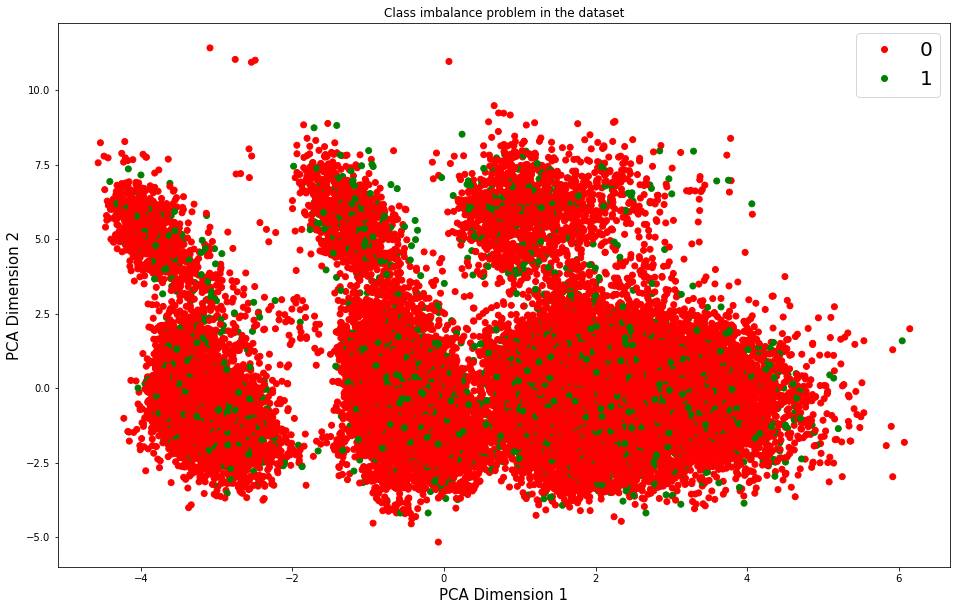

In [71]:
# Use PCA to plot the data using the most significant dimensions. This will give a much clear idea of the class imbalance.
plt.figure(figsize=(16,10))
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1],c=y,cmap=mcolors.ListedColormap(["red", "green"]))
plt.xlabel('PCA Dimension 1',fontsize=15)
plt.ylabel('PCA Dimension 2',fontsize=15)
plt.legend(handles=plot.legend_elements()[0], labels=['0','1'],fontsize=20)
plt.title('Class imbalance problem in the dataset')
plt.show()

From the above figure, we can see that not only there is a class imbalance, but the two classes are also not naturally separable. The positive minority class is shown in green and the negative majority class is shown in red. We will try to tackle this issue by using oversampling and undersampling strategies.

### Oversampling strategies

**(i) Random Oversampling** 

Generating samples of the minority class by randomly sampling with replacement the current available samples.

In [72]:
# The counts of the majority and minority class.
y.value_counts()

0    67806
1     8518
Name: readmitted, dtype: int64

Below, I will be applying RandomOversampler to the entire training set for visualization.<br>
Later, while evaluating, we will apply it **only to the portion of the training set which is not a part of the validation set**

In [73]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X,y)

In [74]:
# Now the counts are balanced.
y_resampled.value_counts()

1    67806
0    67806
Name: readmitted, dtype: int64

**Visualization using PCA**

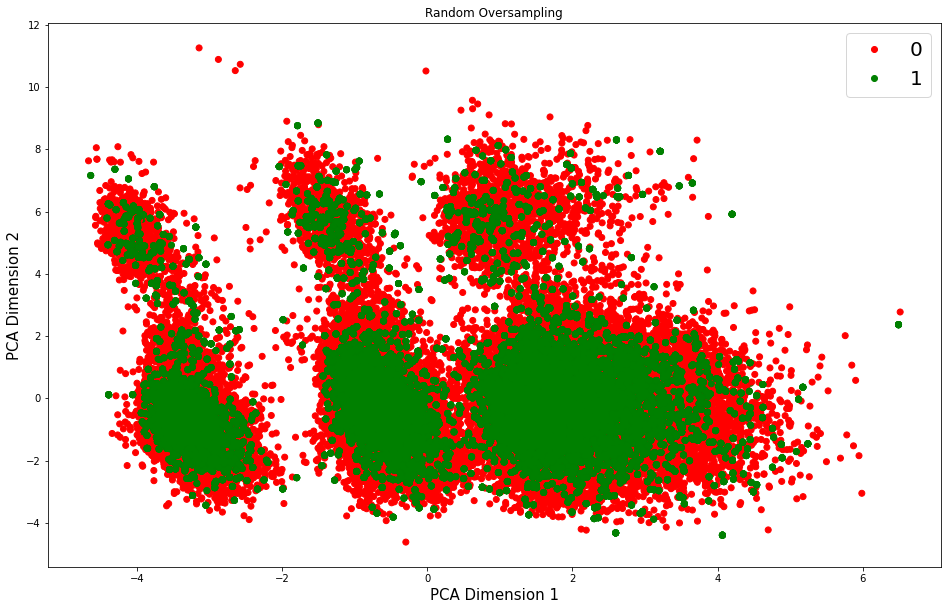

In [75]:
# Using the same technique for visualization as before
plt.figure(figsize=(16,10))
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X_resampled)
plot = plt.scatter(Xt[:,0], Xt[:,1],c=y_resampled,cmap=mcolors.ListedColormap(["red", "green"]))
plt.xlabel('PCA Dimension 1',fontsize=15)
plt.ylabel('PCA Dimension 2',fontsize=15)
plt.legend(handles=plot.legend_elements()[0], labels=['0','1'],fontsize=20)
plt.title('Random Oversampling')
plt.show()

This shows how the new samples of the minority class are created randomly so that the classes are balanced.

**Logistic Regression** <br><br>
Now we will evaluate our model. Fitting a logistic regression model as before but on the cross-validated data and calculating our generalization recall and new custom defined metric F-5 score mentioned earlier.

In [76]:
# The results of validation testing
validation_results = []

In [77]:
# Initializing the recall and F-5 score values across all folds
total_recall = 0
total_F5_score = 0

# Using stratified 5-Fold as mentioned before. 
# For each oversampling and undersampling technique, I will use a different random state during K-Fold, 
# so that we will get a better generalization estimate across the training set.
skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

# Getting the training and validation set indices after splitting
for train_index, valid_index in skf.split(X,y):
    
    # Using the indices, we get the feature matrix and target variable values of training and validation sets.
    X_train, X_valid, y_train, y_valid = X.iloc[train_index], X.iloc[valid_index], y.iloc[train_index], y.iloc[valid_index]
    
    # Using Logistic Regression Model
    lr_ros = LogisticRegression()
    
    # Using Random Oversampler
    ros = RandomOverSampler()
    
    # As mentioned earlier, only the training set will be oversampled and the validation set will be left as it is
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train,y_train)
    
    # Train the Logistic Regression Model
    lr_ros.fit(X_train_resampled,y_train_resampled)
    
    # Predict on the validation set.
    y_pred = lr_ros.predict(X_valid)
    
    # Add the value of recall to the total recall across 5 folds
    total_recall += recall_score(y_valid,y_pred)
    
    # Add the value of F-5 score to the total F-5 score across 5 folds
    # Using beta = 5 to get F-5 score.
    total_F5_score += fbeta_score(y_valid, y_pred, beta=5)
    
# To get a better generalization estimate for Random Oversampling(ros), we average the values across the five folds.
# We have already calculated the total recall and total F-5 score, we will divide it by 5.

recall_ros = total_recall/5
F5_score_ros = total_F5_score/5

# Printing the results. We will summarize them later.
print(f'Recall score on validation set after Random oversampling and Stratified Cross-Validation = {recall_ros}')
print(f'F-5 score on validation set after Random oversampling and Stratified Cross-Validation = {F5_score_ros}')

# Creating a dictionary of the results
ros_results = {'Technique':'Random Oversampling'
               ,'Recall':recall_ros
               ,'F-5 Score':F5_score_ros}

# Appending to the final validation results
validation_results.append(ros_results)

Recall score on validation set after Random oversampling and Stratified Cross-Validation = 0.4962413057322207
F-5 score on validation set after Random oversampling and Stratified Cross-Validation = 0.46255108049443816


**(ii) SMOTE (Synthetic Minority Oversampling Technique)**

SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors.The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space.

Reference: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [78]:
# The counts of the majority and minority class.
y.value_counts()

0    67806
1     8518
Name: readmitted, dtype: int64

In [79]:
# Applying SMOTE to the training set
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X,y)

In [80]:
# Now the counts are balanced.
y_resampled.value_counts()

1    67806
0    67806
Name: readmitted, dtype: int64

**Visualization using PCA**

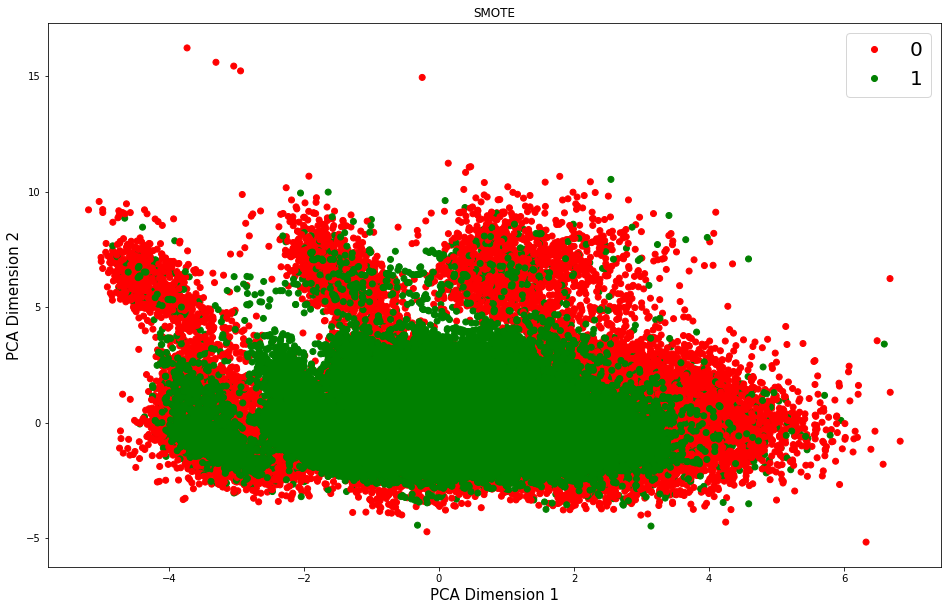

In [81]:
# Using the same technique for visualization as before
plt.figure(figsize=(16,10))
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X_resampled)
plot = plt.scatter(Xt[:,0], Xt[:,1],c=y_resampled,cmap=mcolors.ListedColormap(["red", "green"]))
plt.xlabel('PCA Dimension 1',fontsize=15)
plt.ylabel('PCA Dimension 2',fontsize=15)
plt.legend(handles=plot.legend_elements()[0], labels=['0','1'],fontsize=20)
plt.title('SMOTE')
plt.show()

From the above figure, it is clear that the SMOTE technique is oversampling using the nearest neighbors as the density of the points is high in the lower portion of the figure. This is different from Random Oversampling which is done before.

**Logistic Regression**

In [82]:
# Initializing the recall and F-5 score values across all folds
total_recall = 0
total_F5_score = 0

# Using stratified 5-Fold as mentioned before. 
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=748)

# Getting the training and validation set indices after splitting
for train_index, valid_index in skf.split(X,y):
    
    # Using the indices, we get the feature matrix and target variable values of training and validation sets.
    X_train, X_valid, y_train, y_valid = X.iloc[train_index], X.iloc[valid_index], y.iloc[train_index], y.iloc[valid_index]
    
    # Using Logistic Regression Model
    lr_smote = LogisticRegression()
    
    # Using SMOTE 
    smote = SMOTE()
    
    # As mentioned earlier, only the training set will be oversampled and the validation set will be left as it is
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)
    
    # Train the Logistic Regression Model
    lr_smote.fit(X_train_resampled,y_train_resampled)
    
    # Predict on the validation set.
    y_pred = lr_smote.predict(X_valid)
    
    # Add the value of recall to the total recall across 5 folds
    total_recall += recall_score(y_valid,y_pred)
    
    # Add the value of F-5 score to the total F-5 score across 5 folds
    # Using beta = 5 to get F-5 score.
    total_F5_score += fbeta_score(y_valid, y_pred, beta=5)
    
# To get a better generalization estimate for SMOTE, we average the values across the five folds.
# We have already calculated the total recall and total F-5 score, we will divide it by 5.

recall_smote = total_recall/5
F5_score_smote = total_F5_score/5

# Printing the results. We will summarize them later.
print(f'Recall score on validation set after SMOTE and Stratified Cross-Validation = {recall_smote}')
print(f'F-5 score on validation set after SMOTE and Stratified Cross-Validation = {F5_score_smote}')

# Creating a dictionary of the results
smote_results = {'Technique':'Synthetic Minority Oversampling Technique (SMOTE)'
               ,'Recall':recall_smote
               ,'F-5 Score':F5_score_smote}

# Appending to the final validation results
validation_results.append(smote_results)

Recall score on validation set after SMOTE and Stratified Cross-Validation = 0.32155241096215187
F-5 score on validation set after SMOTE and Stratified Cross-Validation = 0.3100588693405568


### Undersampling strategies

**(i) Random Undersampling**

Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.

In [83]:
# The counts of the majority and minority class.
y.value_counts()

0    67806
1     8518
Name: readmitted, dtype: int64

In [84]:
# Applying Random Undersampler to the training set
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X,y)

In [85]:
# Now the counts are balanced.
y_resampled.value_counts()

1    8518
0    8518
Name: readmitted, dtype: int64

**Visualization using PCA**

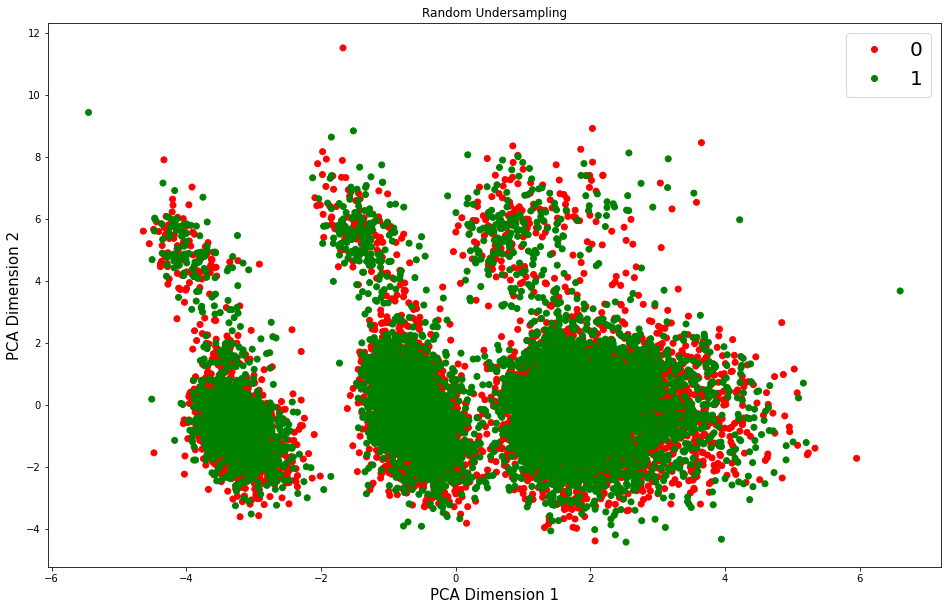

In [86]:
# Using the same technique for visualization as before
plt.figure(figsize=(16,10))
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X_resampled)
plot = plt.scatter(Xt[:,0], Xt[:,1],c=y_resampled,cmap=mcolors.ListedColormap(["red", "green"]))
plt.xlabel('PCA Dimension 1',fontsize=15)
plt.ylabel('PCA Dimension 2',fontsize=15)
plt.legend(handles=plot.legend_elements()[0], labels=['0','1'],fontsize=20)
plt.title('Random Undersampling')
plt.show()

As seen above, the number of majority class samples are reduced now to balance the classes.

In [87]:
# Initializing the recall and F-5 score values across all folds
total_recall = 0
total_F5_score = 0

# Using stratified 5-Fold as mentioned before. 
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=200)

# Getting the training and validation set indices after splitting
for train_index, valid_index in skf.split(X,y):
    
    # Using the indices, we get the feature matrix and target variable values of training and validation sets.
    X_train, X_valid, y_train, y_valid = X.iloc[train_index], X.iloc[valid_index], y.iloc[train_index], y.iloc[valid_index]
    
    # Using Logistic Regression Model
    lr_rus = LogisticRegression()
    
    # Using Random Undersampler 
    rus = RandomUnderSampler()
    
    # As mentioned earlier, only the training set will be undersampled and the validation set will be left as it is
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train,y_train)
    
    # Train the Logistic Regression Model
    lr_rus.fit(X_train_resampled,y_train_resampled)
    
    # Predict on the validation set.
    y_pred = lr_rus.predict(X_valid)
    
    # Add the value of recall to the total recall across 5 folds
    total_recall += recall_score(y_valid,y_pred)
    
    # Add the value of F-5 score to the total F-5 score across 5 folds
    # Using beta = 5 to get F-5 score.
    total_F5_score += fbeta_score(y_valid, y_pred, beta=5)
    
# To get a better generalization estimate for Random Undersampler, we average the values across the five folds.
# We have already calculated the total recall and total F-5 score, we will divide it by 5.

recall_rus = total_recall/5
F5_score_rus = total_F5_score/5

# Printing the results. We will summarize them later.
print(f'Recall score on validation set after Random Undersampling and Stratified Cross-Validation = {recall_rus}')
print(f'F-5 score on validation set after Random Undersampling and Stratified Cross-Validation = {F5_score_rus}')

# Creating a dictionary of the results
rus_results = {'Technique':'Random Undersampling'
               ,'Recall':recall_rus
               ,'F-5 Score':F5_score_rus}

# Appending to the final validation results
validation_results.append(rus_results)

Recall score on validation set after Random Undersampling and Stratified Cross-Validation = 0.5075160101340082
F-5 score on validation set after Random Undersampling and Stratified Cross-Validation = 0.471386203600756


**(ii) Near Miss**

Near Miss is an undersampling technique which selects the majority samples which are closest to a given minority sample for discarding. This way, the two classes are easier to separate. I expect this technique to provide the most effective recall score.

In [88]:
# The counts of the majority and minority class.
y.value_counts()

0    67806
1     8518
Name: readmitted, dtype: int64

In [89]:
# Applying Near Miss to the training set
nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X,y)

In [90]:
# Now the counts are balanced.
y_resampled.value_counts()

1    8518
0    8518
Name: readmitted, dtype: int64

**Visualization using PCA**

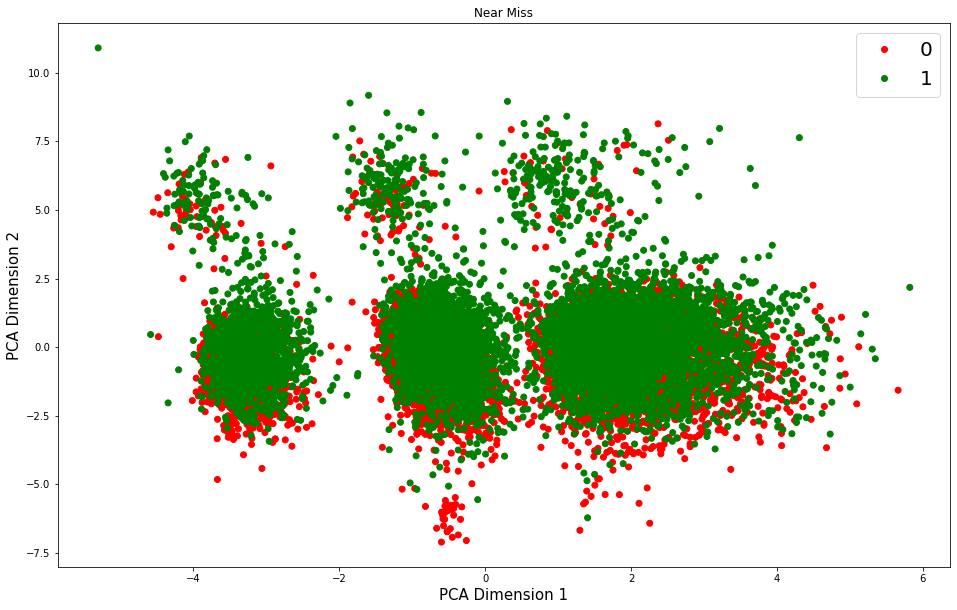

In [91]:
# Using the same technique for visualization as before
plt.figure(figsize=(16,10))
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X_resampled)
plot = plt.scatter(Xt[:,0], Xt[:,1],c=y_resampled,cmap=mcolors.ListedColormap(["red", "green"]))
plt.xlabel('PCA Dimension 1',fontsize=15)
plt.ylabel('PCA Dimension 2',fontsize=15)
plt.legend(handles=plot.legend_elements()[0], labels=['0','1'],fontsize=20)
plt.title('Near Miss')
plt.show()

The result of Near Miss is as shown above. We will perform the same procedure as before to calculate recall and F-5 score.

**Logistic Regression**

In [92]:
# Initializing the recall and F-5 score values across all folds
total_recall = 0
total_F5_score = 0

# Using stratified 5-Fold as mentioned before. 
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1000)

# Getting the training and validation set indices after splitting
for train_index, valid_index in skf.split(X,y):
    
    # Using the indices, we get the feature matrix and target variable values of training and validation sets.
    X_train, X_valid, y_train, y_valid = X.iloc[train_index], X.iloc[valid_index], y.iloc[train_index], y.iloc[valid_index]
    
    # Train the Logistic Regression Model
    lr_nm = LogisticRegression()
    
    # Using Near Miss undersampling
    nm = NearMiss()
    
    # As mentioned earlier, only the training set will be undersampled and the validation set will be left as it is
    X_train_resampled, y_train_resampled = nm.fit_resample(X_train,y_train)
    
    # Train the Logistic Regression Model
    lr_nm.fit(X_train_resampled,y_train_resampled)
    
    # Predict on the validation set.
    y_pred = lr_nm.predict(X_valid)
    
    # Add the value of recall to the total recall across 5 folds
    total_recall += recall_score(y_valid,y_pred)

    # Add the value of F-5 score to the total F-5 score across 5 folds
    # Using beta = 5 to get F-5 score.
    total_F5_score += fbeta_score(y_valid, y_pred, beta=5)
    
# To get a better generalization estimate for Near Miss Undersampler, we average the values across the five folds.
# We have already calculated the total recall and total F-5 score, we will divide it by 5.

recall_nm = total_recall/5
F5_score_nm = total_F5_score/5

# Printing the results. We will summarize them later.
print(f'Recall score on validation set after Near Miss Undersampling and Stratified Cross-Validation = {recall_nm}')
print(f'F-5 score on validation set after Near Miss Undersampling and Stratified Cross-Validation = {F5_score_nm}')

# Creating a dictionary of the results
nm_results = {'Technique':'Near Miss Undersampling'
               ,'Recall':recall_nm
               ,'F-5 Score':F5_score_nm}

# Appending to the final validation results
validation_results.append(nm_results)

Recall score on validation set after Near Miss Undersampling and Stratified Cross-Validation = 0.6482751372198743
F-5 score on validation set after Near Miss Undersampling and Stratified Cross-Validation = 0.5669044021580605


### Summary of Validation Results

Summarizing the results of cross validation after applying various undersampling and oversampling techniques.

In [93]:
# Creating a dataframe of the validation results and sort it in descending order by F-5 score
pd.DataFrame(validation_results).sort_values('F-5 Score',ascending=False)

,Technique,Recall,F-5 Score
3,Near Miss Undersampling,0.648275,0.566904
2,Random Undersampling,0.507516,0.471386
0,Random Oversampling,0.496241,0.462551
1,Synthetic Minority Oversampling Technique (SMOTE),0.321552,0.310059


From the above dataframe, it can be clearly seen that the model which is giving us a best value of F-5 score is **Logistic Regression with Near Miss Undersampling**. We can consider this as our final model. However, since we are using a logistic regression model which gives back the probabilities for each of the predictions made. We can find a minimum threshold corresponding to which our F-5 score is around 60%. This threshold is our hyperparameter which we can tune.

### Hyperparameter Tuning / Calculating Minimum Threshold

In [94]:
# Function for calculating the minimum threshold which gives the best F-5 score 
def get_minimum_threshold(sorted_scores,lr_probs):
    # Set a list to keep record of threshold and F-5 score values
    threshold_values = []
    F5_score_values = []

    # Consider each score as a threshold point. From these, we have to get an optimum threshold which maximizes F5 score.
    for threshold,actual_label in sorted_scores:
        # For each score, set the True Positives, False Positives and False Negatives to 0.
        # These will be used to calculate precision, recall and F-5 score.
        TP=0
        FN=0
        FP=0
    
        # Now, consider each score returned by the Logistic Regression Model
        for score in lr_probs:
            
            # If the score is more than threshold, then it will be predicted as the positive class or else negative class.
            if score >= threshold:
                predicted_label = 1
            else:
                predicted_label = 0
        
            # Now we have to check if the entry is a True Positive, False Positive or False Negative. 
            # If so, we increment the respective count 
            if actual_label == 1:
                if predicted_label == 1:
                    # If the actual label is positive and the predicted label is positive, then it's a true positive
                    TP+=1
                    # If the actual label is positive, but the predicted label is negative, then it's a false negative
                elif predicted_label == 0:
                    FN+=1
            else:
                if predicted_label == 1:
                    # If the actual label is negative, but the predicted label is positive, then it's a false positive
                    FP+=1
        try: 
            # Calculate the recall and set it to 0 in case of divide by zero exception
            recall = TP/(TP+FN)
        except:
            recall = 0
            
        try:
            # Calculate the precision and set it to 0 in case of divide by zero exception
            precision = TP/(TP+FP)
        except:
            precision = 0
            
        try:
            # Calculate the F5 score (formula mentioned before while deciding the metric) 
            # and set it to 0 in case of divide by 0 exception
            F5_score = 26 * precision * recall / (25 *  precision + recall)
        except:
            F5_score = 0
        
        # Append the threshold and F5_score values to the result lists    
        threshold_values.append(threshold)
        F5_score_values.append(F5_score)
    
    # Sort the values in ascending order based on F5 scores.
    threshold_F5_values = sorted(zip(threshold_values,F5_score_values),key=lambda x:(x[1],x[0]))
    
    # Getting the minimum threshold corresponding to the F5 score > 60%
    for value in threshold_F5_values:
        if value[1] >= 0.6:
            minimum_threshold = value[0]
            break
    
    # Return the result.
    return minimum_threshold

Now, we can use our best model that is Logistic Regression with Near Miss and call the above function to get the minimum threshold value for our problem. Again, this activity will be done on **the training and validation set** only.
Also, we can take advantage of Stratified K-Fold to give a better generalized estimate of the threshold by averaging over folds. <br><br> **Note: The below cell will take some time to run.**

In [95]:
# Using stratified 5-Fold as mentioned before. 
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1648)

# Setting the total threshold over folds to 0.
total_threshold = 0

# Getting the training and validation set indices after splitting
for train_index, valid_index in skf.split(X,y):
    
    # Using the indices, we get the feature matrix and target variable values of training and validation sets.
    X_train, X_valid, y_train, y_valid = X.iloc[train_index], X.iloc[valid_index], y.iloc[train_index], y.iloc[valid_index]
    
    # Using Logistic Regression
    lr_nm = LogisticRegression()
    
    # Using Near Miss undersampling
    nm = NearMiss()
    
    # As mentioned earlier, only the training set will be undersampled and the validation set will be left as it is
    X_train_resampled, y_train_resampled = nm.fit_resample(X_train,y_train)
    
    # Train the Logistic Regression Model
    lr_nm.fit(X_train_resampled,y_train_resampled)
    
    # Predict on the validation set.
    y_pred = lr_nm.predict(X_valid)
    
    # Getting the probabilities of the predictions
    lr_probs = lr_nm.predict_proba(X_valid)
    
    # Considering only Positive Class
    lr_probs = lr_probs[:,1]
    
    # Getting the list of true labels of validation set.
    y_true = y_valid.tolist()
    
    # First sort the probability scores in descending order
    # I have also added the true label for each sample along with the probability score.
    sorted_scores = sorted((zip(lr_probs,y_true)),reverse=True)
    
    # Get the minimum threshold using the function created before and then add it to the total_threshold.
    total_threshold += get_minimum_threshold(sorted_scores,lr_probs)
    
# Divide by 5 to get a better generalized estimate of minimum threshold.    
minimum_threshold = total_threshold / 5
minimum_threshold

0.4558796569471385

Now, we will use our best model along with minimum threshold to get the recall and F-5 score on the validation set.

In [96]:
# Initializing the recall and F-5 score values across all folds
total_recall = 0
total_F5_score = 0

# Using stratified 5-Fold as mentioned before. 
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=573)

# Getting the training and validation set indices after splitting
for train_index, valid_index in skf.split(X,y):
    
    # Using the indices, we get the feature matrix and target variable values of training and validation sets.
    X_train, X_valid, y_train, y_valid = X.iloc[train_index], X.iloc[valid_index], y.iloc[train_index], y.iloc[valid_index]
    
    # Using Near Miss undersampling
    nm = NearMiss()
    
    # Using Logistic Regression
    lr_nm = LogisticRegression()
    
    # As mentioned earlier, only the training set will be undersampled and the validation set will be left as it is
    X_train_resampled, y_train_resampled = nm.fit_resample(X_train,y_train)
    
    # Train the Logistic Regression Model
    lr_nm.fit(X_train_resampled,y_train_resampled)
    
    # Predict on the validation set.
    # Predict 1 only if the probability is more than the minimum threshold.
    # Else predict 0.
    y_pred = list(map(int,lr_nm.predict_proba(X_valid)[:,1] >= minimum_threshold))
    
    # Add the value of recall to the total recall across 5 folds
    total_recall += recall_score(y_valid,y_pred)
    
    # Add the value of F-5 score to the total F-5 score across 5 folds
    total_F5_score += fbeta_score(y_valid, y_pred, beta=5)

# Divide by 5 to get a better generalized estimate.      
print(f'Recall on the validation set using best model with minimum threshold = {total_recall/5}')
print(f'F-5 score on the validation set using best model with minimum threshold = {total_F5_score/5}')

Recall on the validation set using best model with minimum threshold = 0.7086181110936514
F-5 score on the validation set using best model with minimum threshold = 0.6076131849725607


We can see that the recall and F-5 score has improved.

### Final evaluation on the test set

We will now evaluate our model on the preprocessed test set which we haven't used till now. 

In [97]:
# Getting the training and test feature matrices and target variables
X_train,y_train = preprocessed_train.drop('readmitted',axis=1),preprocessed_train['readmitted']
X_test,y_test = preprocessed_test.drop('readmitted',axis=1),preprocessed_test['readmitted']

# Using Near Miss
nm = NearMiss()

# Using Logistic Regression
final_model = LogisticRegression()

# Near Miss Undersampling only on the training set
X_train_resampled, y_train_resampled = nm.fit_resample(X_train,y_train)

# Fitting the model using training set
final_model.fit(X_train_resampled,y_train_resampled)

# Predicting on the test set
# Predict 1 only if the probability is more than the minimum threshold.
# Else predict 0.
y_pred = list(map(int,final_model.predict_proba(X_test)[:,1] >= minimum_threshold))

print(classification_report(y_test,y_pred))
print(f'Recall on the test set using final model with minimum threshold = {recall_score(y_test,y_pred)}')
print(f'F-5 score on the test set using final model with minimum threshold = {fbeta_score(y_test, y_pred, beta=5)}')

              precision    recall  f1-score   support

           0       0.92      0.42      0.58     22603
           1       0.13      0.71      0.22      2839

    accuracy                           0.45     25442
   macro avg       0.53      0.56      0.40     25442
weighted avg       0.83      0.45      0.54     25442

Recall on the test set using final model with minimum threshold = 0.7065868263473054
F-5 score on the test set using final model with minimum threshold = 0.6055989689165495


We can now see that the value of recall and F-5 score on the test set which we did not use till now is almost the same as the ones on the validation set used before. So, our model seems to have generalized well on unseen data. There are fewer false negatives(evident from the recall) and the difference between the recall and F-5 score is indicative of the fact that the F-5 score is managing the precision-recall tradeoff and at the same time heavily emphasizing recall

In [98]:
# Storing the final model results
final_results = {'Model':'Final',
                    'Accuracy':accuracy_score(y_test,y_pred),
                    'Recall':recall_score(y_test,y_pred),
                    'F-5 Score':fbeta_score(y_test, y_pred, beta=5)}

model_results.append(final_results)

In [99]:
# Comparing the model results in the rough and final implementation. Recall and F-5 score has improved a lot as we wanted. 
pd.DataFrame(model_results)

,Model,Accuracy,Recall,F-5 Score
0,Baseline,0.888963,0.015851,0.016467
1,Final,0.450711,0.706587,0.605599


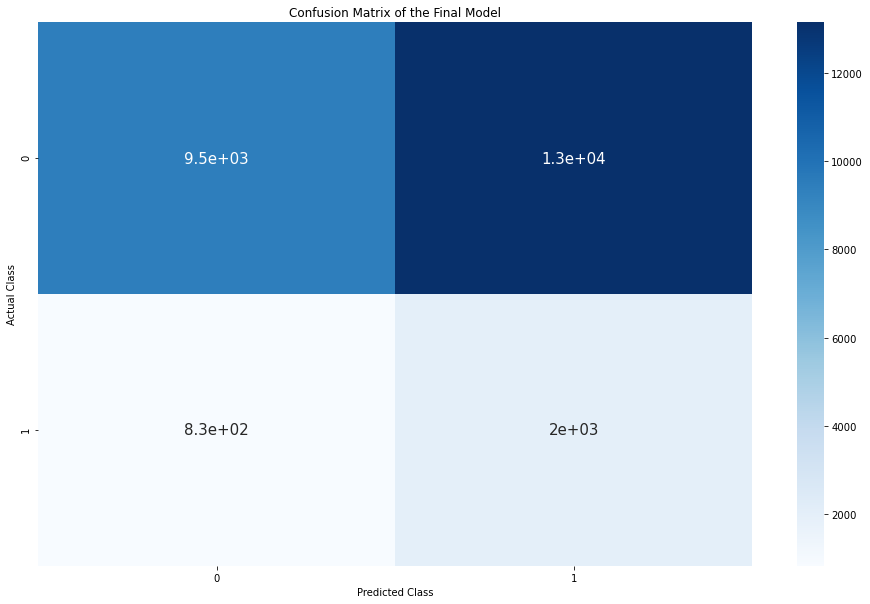

In [100]:
# Confusion Matrix
data = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual Class'
df_cm.columns.name = 'Predicted Class'
plt.figure(figsize=(16,10))
plt.title('Confusion Matrix of the Final Model')
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 15})    
plt.show()

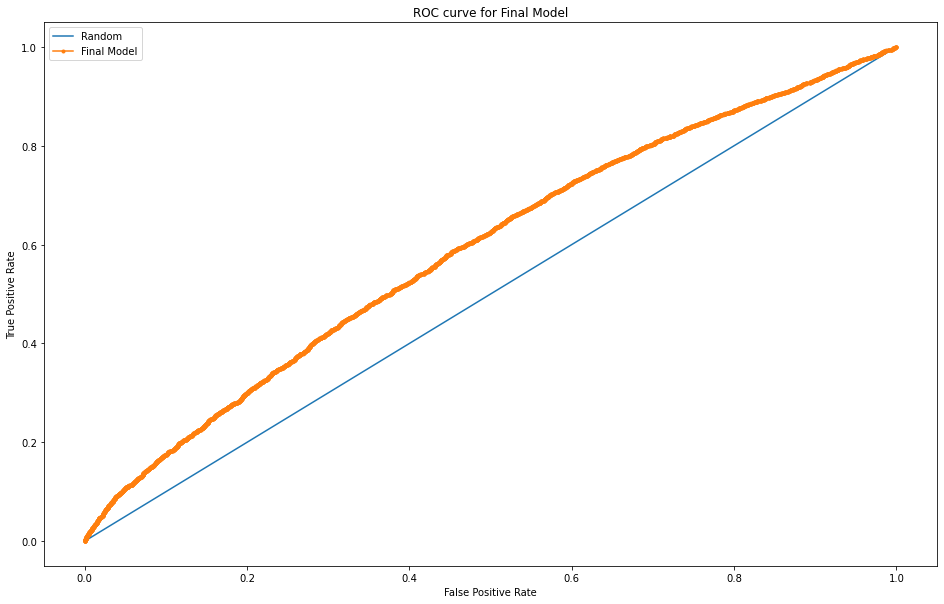

AUC score of Final Model = 58.97676788330581 %


In [101]:
# ROC-AUC curve
plt.figure(figsize=(16,10))
# Calculating probabilities for random model (coin toss)
ns_probs = [0 for _ in range(len(y_test))]
# Calculating probabilities for Logistic Regression Model
lr_probs = final_model.predict_proba(X_test)
# Considering only Positive Class
lr_probs = lr_probs[:,1]
# For plotting ROC cuve, we need TPR and FPR. We can get it for each score (for both random and LR) using the roc_curve function
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, lr_probs)
# Simply use a scatter plot to display these values. That will be the ROC curve.
plt.plot(ns_fpr, ns_tpr, linestyle='-', label='Random')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Final Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Final Model')
plt.legend()
plt.show()
    
# ROC-AUC score
print(f"AUC score of Final Model = {roc_auc_score(y_test,lr_probs)*100} %")

From the above, we can see that the final model is predicting better than random classifier since the AUC score > 50%. 